
# **Custom models and Training with Tensorflow**
---


### **Tour por Tensorflow**
---
Tensorflow es una librería para computación numérica, particularmente bien estructurada y ajustada para Machine Learning de gran escala.

* Su núcleo es similar a NumPy, pero con suporte para GPU.
* Soporta Computación distribuida (a través de múltiples dispositivos y servidores).
* Inluye un tipo de compilador *just-in-time (JIT)* que permite optimizar la velocidad de cálculo y el uso de memoria.
* Las Gráficas de Computación pueden ser exportadas a un formato portable, de forma que se puede entrenar un modelo de TensorFlow en un ambiente (Python o Linux) y correrlo en otro (Java o Android).
* Implementa autodiff y provee optimizadores excelentes, como RMSProp, Nadam y FTRL.
* Ofrece muchas más características, construidas en el top de estos núcleos: el más importante es **tf.keras**, pero también tiene *data loading* y *preprocessing ops (tf.data, tf.io, etc)*, operaciones de procesamiento de imágenes (tf.images), operaciones de procesmiento de señales(tf.signal) y más.

Muchas operaciones (ops de ahora en adelante) tienen múltiples implementaciones, llamadas *kernels*: cada kernel es dedicado a un tipo de dispositivo específico, como CPUs, GPUs o TPUs.

Tensorflow no solo corre en Windows, Linux y MacOS, sino también en dispositivos móbiles como *TensorFlow Lite*, incluyendo iOS y Android.

**TensorFlow es más que solamente un librería**. TensorFlow es un centro de un ecosistemas extenso en librerías.
1. TensorBoard para visualizaciones.
2. TensorflowExtended (TFX): set de librerías contruidas por Google para la producción de proyectos de TensorFlow, que incluye herramientas de visualización de datos, preprocesamiento, análisis de modelos y *serving*.
3. Google también lanzó TensorFlow Hub, una forma de descargar y reusar fácilmente modelos de Redes Neurales preentrenados.

---
### **Usando TensorFlow como NumPy**
---

La API de TensorFlow se desenvuelve apartir de *tensores*. **Un Tensor es usualmente un arreglo multidimensional (exactamente como un ndarray de NumPy), pero también soporta escalares (un simple valor como 42).**

**Operaciones con Tensores**

In [3]:
import tensorflow as tf
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # Matriz

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [8]:
t = tf.constant([[1.,2.,3.,],[4.,5.,6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [9]:
t.shape

TensorShape([2, 3])

In [10]:
t.dtype

tf.float32

**Indexing**

In [11]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [27]:
# Ellipsis funciona para un slicing multidimensional.
# Sirve para facilitar el slicing avanzado.
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [28]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [29]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [30]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [32]:
tf.transpose(t) @ t

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[17., 22., 27.],
       [22., 29., 36.],
       [27., 36., 45.]], dtype=float32)>

**API de bajo nivel de Keras**

La API de Keras tiene su propia API de abjo nivel, localizada en *keras.backend*. INcluye funcioes como *square(), exp(), sqrt()* y demás.

In [33]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### **Tensores y NumPy**

Los Tensores van bien de la mano con NumPy: Se puede crear un tensor desde un arreglo de NumPy y vice versa.

In [35]:
import numpy as np

a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [36]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [38]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [39]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [40]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

***NOTA: NumPy usa una precisión por default de 64 bits mientras que TensorFlow usa 32 bits. Esto es porque una precisión de 32 bits es generalmente más que suficiente para redes neurales***

### **Conversiones de Tipo**

Las conversiones de tipo pueden afectar significativamente el rendimiento, y pueden pasar por alto fácilmente dado que son hecas automáticamente. **Es por ello que TensorFlow no realiza ninguna conversión automáticamente: solo lanza excepciones si se intenta ejecutar una operación de tensores con tipos incompatibles**.

In [42]:
try:
  tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 


In [44]:
try:
  tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 


In [45]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## **Variables**
---
*tf.Variable* actúa más como un tensor constante: se pueden realizar las mismas operaciones con estos y es compatible con NumPy también.

In [46]:
tf.constant(b"Hola, mundo")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hola, mundo'>

In [47]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [49]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [50]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [51]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [55]:
p = tf.constant(["Café", "Coffe", "caffè"])

In [56]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 5], dtype=int32)>

In [58]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101], [99, 97, 102, 102, 232]]>

In [59]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101], [99, 97, 102, 102, 232]]>


***En la práctica, muy rara vez se tendrán que crear variables manualmente, dado que Keras provee un método add_weight() que se encargará de ello.***

**Otras Estructuras de datos**
* *Sparse tensors (tf.SparseTensor)* representa eficientemente que contienen en su mayoría 0s.
* * Tensor arrays (tf.TensorArray)* son como listas de tensores.
* * Ragged tensors (tf.RaggedTensor)* representan listas estáticas de listas de tensores, donde cada tensro tiene la misma forma y el mismo tipo de dato.
* *String tensors* Representan strings en bytes, no en Unicode.
* *Sets* son representados como tensores regulares (o sparse tensors) que contienen uno o más sets.
* *Queues*, incluyen First In, First Out (FIFO) queues (FIFOQueue).

---
# **Modificando Modelos y Algoritmos de Entrenamiento**
---



## **Loss Functions**

**Supongamos que tenemos un modelo de regresión, pero tiene un set muy ruidoso:**.
* Se trata de limpiar eliminando anomalías, pero no es suficiente. El data set continúa con ruido.
*  *Mean squared error* puede penalizar errores grandes demasiado.
* *Mean absolute error* puede no penalizar outliers mucho, pero el entrenamiento tomará un tiempo para converger y puede que le modelo no sea muy preciso.
* **Es buen momento para empelar huber loss**
* Huber Loss no está en la API oficial de Keras, pero está disponible en tf.keras. Pretenderemos que no lo está.


In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)
X_train, X_valid, y_train,y_valid = train_test_split(X_train_full, y_train_full,
                                                    random_state=42)

In [63]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [67]:
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

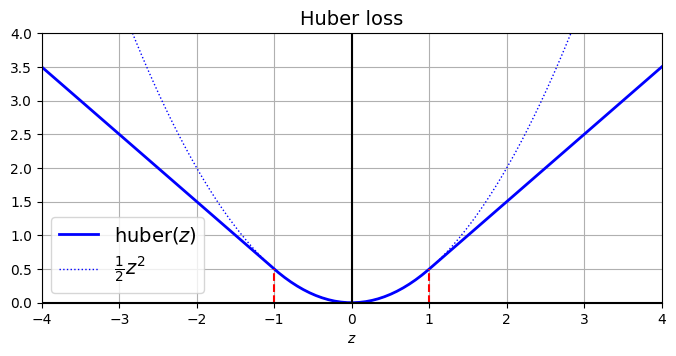

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [70]:
from tensorflow import keras

input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

In [71]:
model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])

In [74]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 0.5622 - mae: 0.9190 - val_loss: 0.3298 - val_mae: 0.6256
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.2171 - mae: 0.5138 - val_loss: 0.2815 - val_mae: 0.5766


## **Guardando/Cargando Modelos con Custom Objects**
---

Cuando se carga un modelo que contiene objetos modificiados, se requiere mapear los nombres a los objetos.

In [75]:
model.save("mi_modelo_con_loss_modificada.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
model = keras.models.load_model("mi_modelo_con_loss_modificada.h5",
                                custom_objects={"huber_fn": huber_fn})

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.2052 - mae: 0.4954 - val_loss: 0.2301 - val_mae: 0.5133
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.1976 - mae: 0.4839 - val_loss: 0.1972 - val_mae: 0.4777


Con esta implementación, cualquier error entre -1 y 1 es considerado "pequeño". ¿Pero qué pasa si se requiere un threshold distinto?
* Una solución es crear una fucnión que cree una función de pérdida coonfigurada.

In [83]:
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error=y_true - y_pred
    is_small_error = tf.abs(error)<threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold**2/2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn


In [89]:
model.compile(loss = create_huber(2.0), optimizer='nadam', metrics=["mae"])

**¿Por qué es necesario emplear una función que cree a la función de pérdida?**

**Porque la función de pérdida se llamará desde dentro del modelo cada vez que se requieran ajustar los parámetros. Lo que se necesita es implementar un código que ajuste el valor de *threshold* cuando se delcara.**


In [90]:
model.fit(X_train_scaled, y_train, epochs=2,
         validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 5ms/step - loss: 0.2102 - mae: 0.4749 - val_loss: 0.1959 - val_mae: 0.4538
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2066 - mae: 0.4701 - val_loss: 0.2241 - val_mae: 0.4703


Desafortunadamente, cuando se guarda el modelo, el threshold no será guardado. Esto significa que se tendrá que especificar cuando se carga.

In [94]:
model.save("mi_modelo_con_loss_modificada_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
model = keras.models.load_model("mi_modelo_con_loss_modificada_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [98]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 10ms/step - loss: 0.2058 - mae: 0.4675 - val_loss: 0.2081 - val_mae: 0.4600
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.2018 - mae: 0.4648 - val_loss: 0.1891 - val_mae: 0.4482


Esto se pude resolver creando una subclase de *keras.losses.Loss* e immplementar su método *get_config()*.

* ***call()***. Toma las etiquetas y las predicciones, calcula la pérdida de las isntancia y las retorna.
* ***get_config()*** retorna un diccionario que mapea cada nombre de hiperparámetro a su valor.

In [100]:
class HuberLoss(keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs):
    self.threshold = threshold
    super().__init__(**kwargs)
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error =  tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold + tf.abs(error) - self.threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  def get_config(self):
    base_config  = super().get_config()
    return {**base_config, "threshold": self.threshold}

In [102]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [103]:
model.compile(loss=HuberLoss(2.), optimizer='nadam', metrics=["mae"])

In [104]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 0.6643 - mae: 0.9337 - val_loss: 0.3334 - val_mae: 0.6061
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2344 - mae: 0.5102 - val_loss: 0.2766 - val_mae: 0.5455


In [105]:
model.save("mi_modelo_con_clase_loss_modificada.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [107]:
model = keras.models.load_model("mi_modelo_con_clase_loss_modificada.h5",
                          custom_objects={"HuberLoss": HuberLoss})

In [108]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.2213 - mae: 0.4941 - val_loss: 0.2334 - val_mae: 0.5022
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2131 - mae: 0.4855 - val_loss: 0.2081 - val_mae: 0.4734


In [109]:
model.loss.threshold

2.0